In [10]:
import numpy as np
from numpy.polynomial.chebyshev import chebfit, chebval
from numpy.polynomial.chebyshev import Chebyshev

import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def cpt_compress_t(signal, dropout_ratio, andDecompress:bool):

  
    # Create the time vector for Chebyshev fitting
    x = np.linspace(-1, 1, signal.size)

    # Fit Chebyshev polynomial
    cpt_coeffs = chebfit(x, signal, deg=signal.size-1)

    #cheb_fit = Chebyshev.fit(x, signal, signal.size)
    #cpt_coeffs = cheb_fit.coef
    #plt.plot(cpt_coeffs)

    # Calculate the number of coefficients to zero out
    num_coeffs = int((dropout_ratio) * len(cpt_coeffs))
    
    # Sort the coefficients by value and cut off the smallest ones
    sorted_indices = np.argsort(np.abs(cpt_coeffs))
    indices_to_zero = sorted_indices[:num_coeffs]

    # print(cpt_coeffs)
    # Zero out selected coefficients
    cpt_coeffs[indices_to_zero] = 0
    #print(cpt_coeffs)

    #plt.plot(cpt_coeffs)

    num_nonzero_after = np.sum(np.abs(cpt_coeffs) > 0)  

    print(f'Number of non-zero coefficients after compression: {num_nonzero_after}')

    if andDecompress == False:
        return cpt_coeffs
    else:
        # Decompress signal
        #cheb_fit_compressed = Chebyshev(cpt_coeffs)
        #cheb_approx_compressed = cheb_fit_compressed(x)
        cheb_approx_compressed = chebval(x, cpt_coeffs)
        
        return cheb_approx_compressed


Number of non-zero coefficients after compression: 100


Text(0.5, 1.0, 'Signal and Approximated Signal')

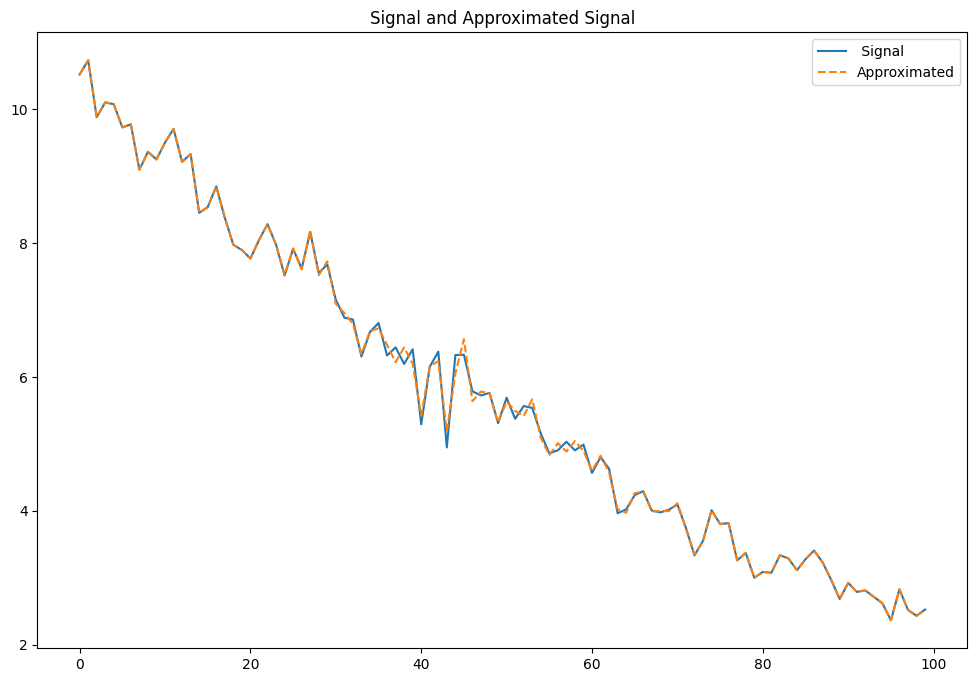

In [12]:
x = np.linspace(-1, 1, 100)
a = x**2 - 4 * x + 5

#a = signal = np.sin(5 * np.pi * x) * 100
#a = np.random.rand(1000)

# Add noise
a = a + np.random.normal(0.5, 0.3, a.shape)


# Min-max normalization to bring the values into range [-1, 1]
""" min_val = np.min(a)
max_val = np.max(a)
a = -1 + 2 * (a- min_val) / (max_val - min_val)

print(max(a), min(a)) """



c = cpt_compress_t(a, 0.0, True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(a, label=' Signal')
ax.plot(c, label='Approximated', linestyle='--', markersize=5)

ax.legend()
ax.set_title('Signal and Approximated Signal')
